# Logistic Regression - Male Athletes

In [73]:
# Data Imports
import numpy as np
import pandas as pd


# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [74]:
# Reading csv files
games_women = pd.read_csv('athletes-women.csv')
games_men = pd.read_csv('athletes-men.csv')
athletes = pd.read_csv('athletes-all.csv')

# athletes who made it into the games
games_all = pd.concat([games_women, games_men])
games_women = games_women.drop(columns = ['rank', 'latitude', 'longitude', 'name', 'region'])
games_men = games_men.drop(columns = ['rank', 'latitude', 'longitude', 'name', 'region'])

In [75]:
df = athletes.merge(games_all.drop_duplicates(), on=['athlete_id'],
                   how='left', indicator=True)

In [76]:
# taking only the columns we want
df_all = df[['athlete_id', 'age_x', 'gender', 'height_x', 'weight_x', 'fran_x', 'run5k_x', 'pullups_x', '_merge', 'train', 'experience', 'schedule', 'howlong_x', 'run400_x', 'candj_x', 'snatch_x', 'deadlift_x', 'backsq_x']]
df_all = df_all.dropna()

df_all_men = df_all.loc[df_all['gender'] == 'Male']

In [77]:
# ones who have not made it who have stats filled out, temp while cleaning up
def make_columns_numeric(df):    
    not_make = df.loc[df['_merge'] == 'left_only']
    not_make['howlong_x'] = not_make['howlong_x'].str.slice(0, 6)

    col         = 'howlong_x'
    conditions  = [ not_make[col].str.contains("Less"), not_make[col].str.contains("6-12"), not_make[col].str.contains("1-2"), not_make[col].str.contains("2-4"), not_make[col].str.contains("4+") ]
    choices     = [0,1,2,3,4]

    not_make["howlong"] = np.select(conditions, choices)

    not_make['coach'] = np.where(not_make['train'].str.contains("have a coach"), 1, 0)
    not_make['certification'] = np.where(not_make['experience'].str.contains("Level 1"), 1, 0)
    not_make['multiple'] = np.where(not_make['schedule'].str.contains("multiple workouts"), 1, 0)

    return not_make

not_make_men = make_columns_numeric(df_all_men)


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1169/2724272476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_make['howlong_x'] = not_make['howlong_x'].str.slice(0, 6)
/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1169/2724272476.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_make["howlong"] = np.select(conditions, choices)
/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1169/2724272476.py:12: SettingWithCopyWarning: 
A value is trying to be set on a co

In [78]:
#not_in_games will contain all athletes that did not make it, with stats, with cleaned up columns
not_in_games_men = not_make_men[['athlete_id', 'age_x', 'height_x', 'weight_x', 'fran_x', 'run5k_x', 'pullups_x', 'run400_x', 'candj_x', 'snatch_x', 'deadlift_x', 'backsq_x','howlong','coach','certification','multiple']]
not_in_games_men.rename(columns={"age_x": "age",'height_x': 'height', 'weight_x':'weight', 'fran_x':'fran', 'run5k_x':'run5k','pullups_x':'pullups', 'run400_x':'run400', 'candj_x':'candj', 'snatch_x':'snatch', 'deadlift_x':'deadlift', 'backsq_x':'backsq'}, inplace = True)

/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [108]:
#Min and Max of men
not_in_games_men2 = not_in_games_men.loc[(not_in_games_men["age"] >= 18) & (not_in_games_men["height"] <= 100) & (not_in_games_men["height"] >= 50) & (not_in_games_men["weight"] <= 300) & (not_in_games_men["weight"] >= 100) &(not_in_games_men["fran"] <= 600) & (not_in_games_men["fran"] >= 113) & (not_in_games_men["run400"] <= 180) & (not_in_games_men["run400"] >= 43) & (not_in_games_men["run5k"] <= 3600) & (not_in_games_men["run5k"] >= 769) & (not_in_games_men["pullups"] <= 100) &(not_in_games_men["backsq"] <= 1157) &(not_in_games_men["deadlift"] <= 1105)]
not_in_games_men2.agg([min, max])



,athlete_id,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,howlong,coach,certification,multiple
min,86.0,18.0,55.0,101.0,115.0,784.0,0.0,43.0,0.0,0.0,0.0,0.0,0,0,0,0
max,623866.0,56.0,82.0,300.0,600.0,3562.0,100.0,180.0,428.0,500.0,717.0,675.0,4,1,1,1


In [80]:
games_men['in_games'] = 1
not_in_games_men2['in_games'] = 0

/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_1169/3671322111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_in_games_men2['in_games'] = 0


In [81]:
df_men = not_in_games_men2.append(games_men)

# Drop ID column
df_men = df_men.drop(['athlete_id'],axis=1)

# Histograms

In [82]:
#Men
df_men.groupby('in_games').mean()

,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,howlong,coach,certification,multiple
in_games,,,,,,,,,,,,,,,
0,32.982485,70.484114,188.232383,264.601222,1333.342974,37.000000,68.983707,241.255601,185.551120,422.789206,343.195112,2.729532,0.332383,0.477189,0.553768
1,36.479021,69.695804,188.664336,170.632867,1276.590909,58.493007,63.611888,293.360140,235.101399,478.388112,407.590909,1.405594,0.391608,0.632867,0.702797


In [83]:
#Separating in and not in games
df_men_ingames = df_men.loc[df_men['in_games'] == 1]
df_men_nogames = df_men.loc[df_men['in_games'] == 0]

### Age

Text(0.5, 1.0, 'Overlapping plots')

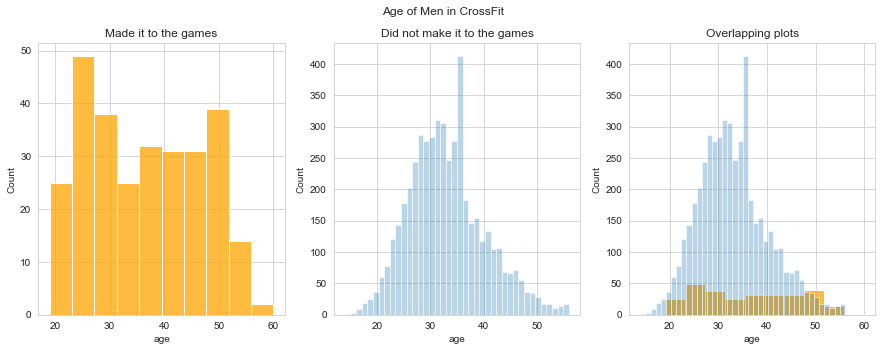

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Age of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="age", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="age", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="age", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="age", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Weight

Text(0.5, 1.0, 'Overlapping plots')

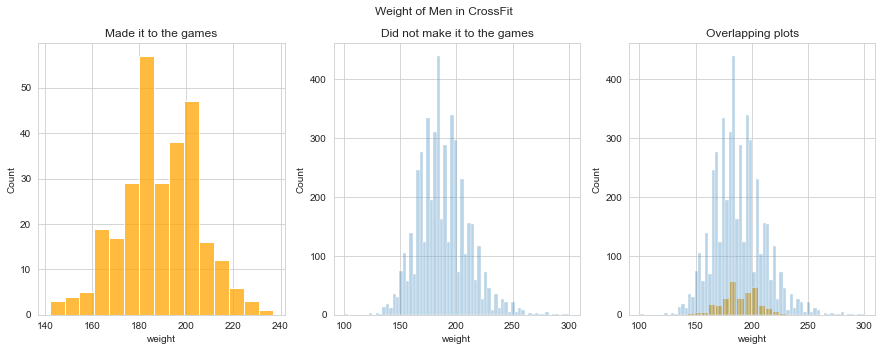

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Weight of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="weight", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="weight", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="weight", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="weight", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Height

Text(0.5, 1.0, 'Overlapping plots')

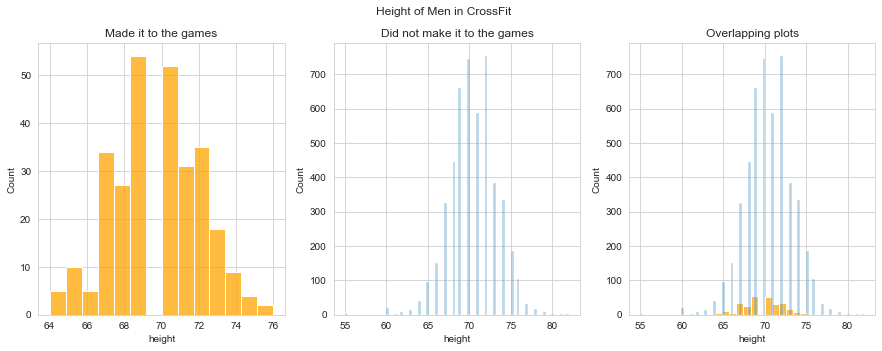

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Height of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="height", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="height", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="height", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="height", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Run5k

Text(0.5, 1.0, 'Overlapping plots')

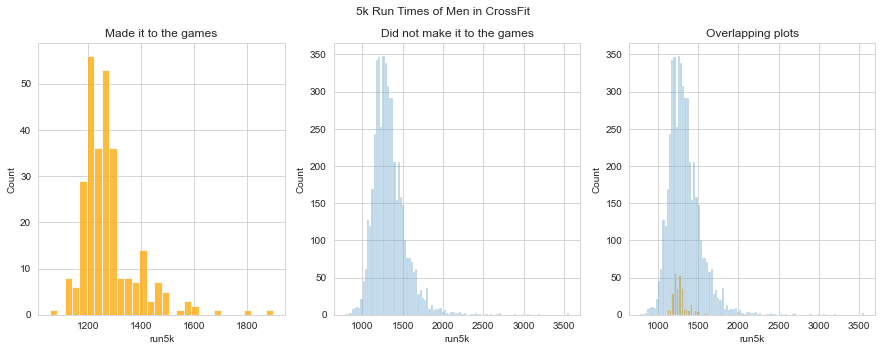

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('5k Run Times of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="run5k", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="run5k", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="run5k", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="run5k", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Run400

Text(0.5, 1.0, 'Overlapping plots')

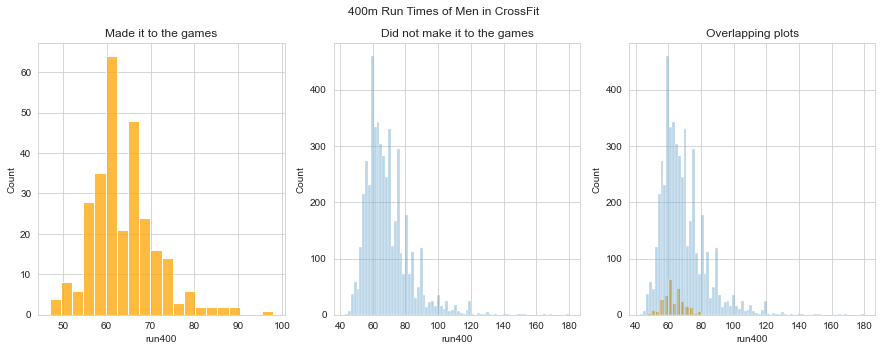

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('400m Run Times of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="run400", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="run400", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="run400", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="run400", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Clean and Jerk (candj)

Text(0.5, 1.0, 'Overlapping plots')

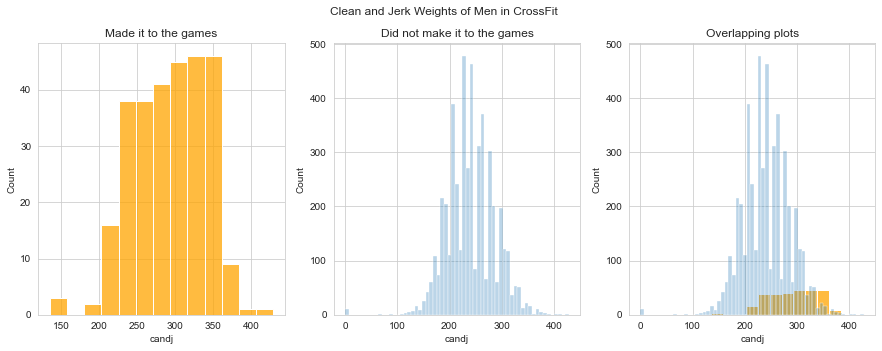

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Clean and Jerk Weights of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="candj", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="candj", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="candj", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="candj", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Snatch

Text(0.5, 1.0, 'Overlapping plots')

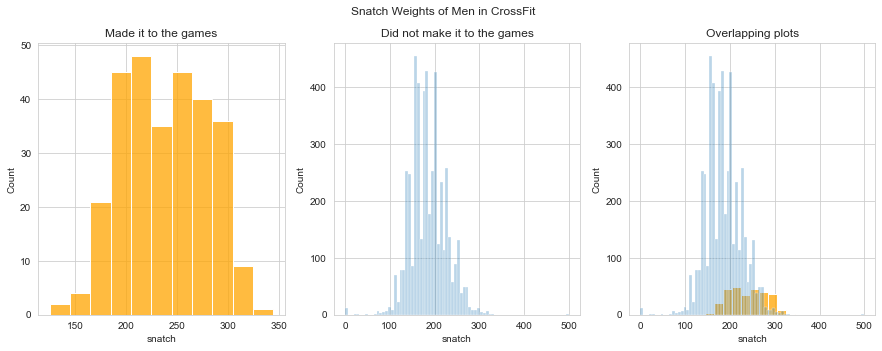

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Snatch Weights of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="snatch", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="snatch", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="snatch", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="snatch", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Back Squat (backsq)

Text(0.5, 1.0, 'Overlapping plots')

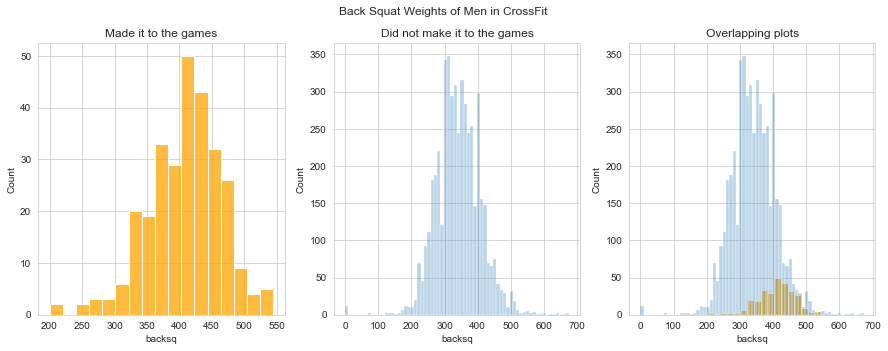

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Back Squat Weights of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="backsq", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="backsq", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="backsq", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="backsq", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Deadlift

Text(0.5, 1.0, 'Overlapping plots')

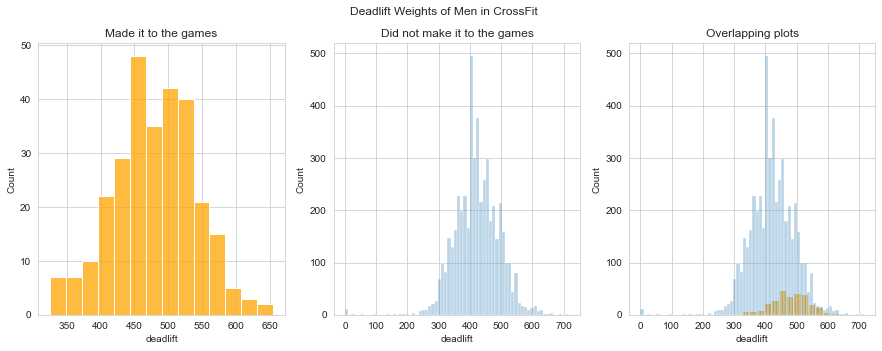

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Deadlift Weights of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="deadlift", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="deadlift", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="deadlift", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="deadlift", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Pullups

Text(0.5, 1.0, 'Overlapping plots')

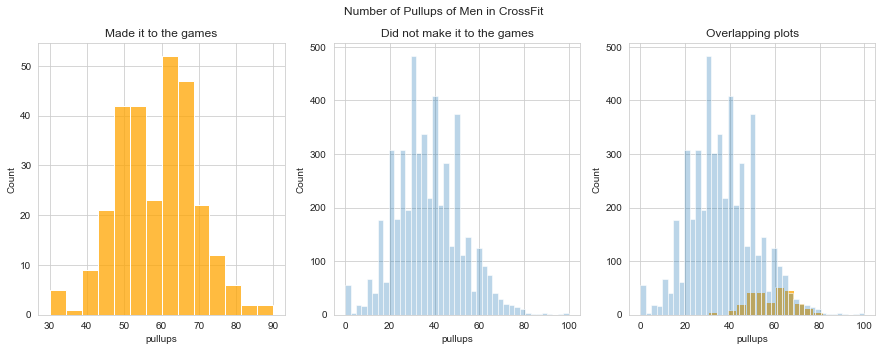

In [93]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Number of Pullups of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="pullups", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="pullups", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="pullups", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="pullups", alpha=0.3)
axes[2].set_title("Overlapping plots")

## Clean up Categorical

In [94]:
# Create Dataframes for Categorical Variables
howlong_men_dummies = pd.get_dummies(df_men['howlong']) # men athletes

howlong_men_dummies

,0,1,2,3,4
12,0,0,0,1,0
101,0,0,0,0,1
102,0,0,0,1,0
110,0,0,0,1,0
115,0,0,0,0,1
...,...,...,...,...,...
281,0,0,1,0,0
282,1,0,0,0,0
283,1,0,0,0,0
284,1,0,0,0,0


In [95]:
# Create column names for the new DataFrames
howlong_men_dummies.columns = ['hl1','hl2','hl3','hl4','hl5']

In [96]:
# Set X as new DataFrame without the howlong columns or the Y target
X_m = df_men.drop(['howlong'], axis=1)
X_m

,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,coach,certification,multiple,in_games
12,31.0,65.0,150.0,119.0,1211.0,81.0,61.0,290.0,225.0,465.0,405.0,0,1,1,0
101,44.0,69.0,168.0,175.0,1470.0,34.0,85.0,245.0,185.0,435.0,405.0,0,0,0,0
102,24.0,68.0,180.0,126.0,1302.0,80.0,58.0,315.0,240.0,475.0,405.0,1,1,1,0
110,31.0,67.0,150.0,244.0,1268.0,42.0,63.0,230.0,175.0,410.0,330.0,0,1,1,0
115,34.0,69.0,185.0,183.0,1188.0,51.0,62.0,275.0,215.0,530.0,450.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,51.0,69.0,178.0,203.0,1260.0,55.0,66.0,255.0,165.0,425.0,330.0,1,1,1,1
282,41.0,70.0,179.0,339.0,1241.0,55.0,68.0,225.0,185.0,345.0,305.0,0,1,0,1
283,47.0,70.0,217.0,390.0,1806.0,34.0,72.0,315.0,245.0,485.0,420.0,1,0,0,1
284,54.0,67.0,167.0,188.0,1344.0,55.0,74.0,230.0,170.0,405.0,345.0,0,0,0,1


In [97]:
# Now Concat the X DataFrame with the dummy variables
X_m = pd.concat([X_m,howlong_men_dummies],axis=1)

# Preview of Result
X_m.head()

,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,coach,certification,multiple,in_games,hl1,hl2,hl3,hl4,hl5
12,31.0,65.0,150.0,119.0,1211.0,81.0,61.0,290.0,225.0,465.0,405.0,0,1,1,0,0,0,0,1,0
101,44.0,69.0,168.0,175.0,1470.0,34.0,85.0,245.0,185.0,435.0,405.0,0,0,0,0,0,0,0,0,1
102,24.0,68.0,180.0,126.0,1302.0,80.0,58.0,315.0,240.0,475.0,405.0,1,1,1,0,0,0,0,1,0
110,31.0,67.0,150.0,244.0,1268.0,42.0,63.0,230.0,175.0,410.0,330.0,0,1,1,0,0,0,0,1,0
115,34.0,69.0,185.0,183.0,1188.0,51.0,62.0,275.0,215.0,530.0,450.0,1,1,1,0,0,0,0,0,1


In [98]:
# Set Y as Target class, in games, for men and women
Y_m = df_men.in_games

# Preview
Y_m

12     0
101    0
102    0
110    0
115    0
      ..
281    1
282    1
283    1
284    1
285    1
Name: in_games, Length: 5196, dtype: int64

In [99]:
# Dropping one column of each dummy variable set to avoid multicollinearity
X_m = X_m.drop(['hl1'], axis=1)

# Drop affairs column so Y target makes sense
X_m = X_m.drop(['in_games'], axis=1)

# Preview
X_m.head()

,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,coach,certification,multiple,hl2,hl3,hl4,hl5
12,31.0,65.0,150.0,119.0,1211.0,81.0,61.0,290.0,225.0,465.0,405.0,0,1,1,0,0,1,0
101,44.0,69.0,168.0,175.0,1470.0,34.0,85.0,245.0,185.0,435.0,405.0,0,0,0,0,0,0,1
102,24.0,68.0,180.0,126.0,1302.0,80.0,58.0,315.0,240.0,475.0,405.0,1,1,1,0,0,1,0
110,31.0,67.0,150.0,244.0,1268.0,42.0,63.0,230.0,175.0,410.0,330.0,0,1,1,0,0,1,0
115,34.0,69.0,185.0,183.0,1188.0,51.0,62.0,275.0,215.0,530.0,450.0,1,1,1,0,0,0,1


In [100]:
# Flatten array
Y_m = np.ravel(Y_m)

# Check result
Y_m

array([0, 0, 0, ..., 1, 1, 1])

# Logistic Regression

### Men

In [101]:
# Create LogisticRegression model
log_model_m = LogisticRegression()

# Fit our data
log_model_m.fit(X_m,Y_m)

# Check our accuracy
log_model_m.score(X_m,Y_m)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9522709776751347

In [102]:
# Check percentage of women that made it to the games
Y_m.mean()

0.0550423402617398

In [103]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df_m = pd.DataFrame(zip(X_m.columns,np.transpose(log_model_m.coef_)))
coeff_df_m

,0,1
0,age,[0.20178971639336155]
1,height,[-0.23855981431415677]
2,weight,[-0.003286887647491796]
3,fran,[-0.0040907545755037]
4,run5k,[0.0016490585955515182]
5,pullups,[0.07048722200194456]
6,run400,[-0.059574613794441074]
7,candj,[0.015492068517465924]
8,snatch,[0.024256650678197607]
9,deadlift,[-0.0022894384137374093]


#### Testing and Training Sets

In [104]:
# Split the data
X_m_train, X_m_test, Y_m_train, Y_m_test = train_test_split(X_m,Y_m)

# Make a new log_model
log_model2_m = LogisticRegression()

# Now fit the new model
log_model2_m.fit(X_m_train,Y_m_train)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
# Predict the classes of the testing data set
class_predict_m = log_model2_m.predict(X_m_test)


# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_m_test,class_predict_m)

0.9561200923787528

## Confusion Matrix

In [106]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

def confusion_matrix(y, y_pred):
    cm = sk_confusion_matrix(y, y_pred)
    cm = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm.columns.name = 'Predicted label'
    cm.index.name = 'True label'
    error_rate = (y_pred != y).mean()
    print('error rate: %.2f' % error_rate)
    return cm

confusion_matrix(Y_m_test, class_predict_m)

error rate: 0.04


Predicted label,0,1
True label,,
0,1220,12
1,45,22
